## Penjelasan Dataset yang digunakan

In [1]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

### Tweet Twitter terkait COVID-19 periode April hingga Juni 2021. 
##### 1. Analisis Sentimen terhadap Tweet terkait COVID-19. Data Tweet yang dikumpulkan selama periode April hingga Juni 2021. Tujuan Analisis	Untuk mengidentifikasi dan mengukur opini (positif, negatif, atau netral) publik di Twitter mengenai pandemi COVID-19 selama periode tersebut. Kolom Teks Utama	original_text (teks asli) . Data ini dapat diperoleh dari kaggle.


##### 2. Penjelasan Setiap Kolom Data

Berikut merupakan penjelasan untuk kolom-kolom kunci:
1. ID unik dari tweet tersebut.
2. created_at  Tanggal dan waktu tweet dibuat.
3. original_text teks tweet yang sebenarnya (sebelum pembersihan).Ini adalah kolom utama yang akan dianalisis.
4. clean_tweet teks tweet setelah melalui proses cleaning (menghilangkan link, tanda baca, dsb.). 
5. original_author  Pengguna yang membuat tweet tersebut.
6. retweet_count  Engagement Jumlah retweet yang diterima tweet tersebut.
7. favorite_count  Engagement Jumlah like (favorite) yang diterima tweet tersebut.
8. ompound  Skor sentimen gabungan (biasanya antara -1.0 dan 1.0), digunakan untuk menentukan polaritas.
9. neg Hasil  sentimen negatif (antara 0 dan 1).
10. neu Hasil  sentimen netral (antara 0 dan 1).
11. pos Hasil  sentimen positif (antara 0 dan 1).
12. sentiment Label polaritas akhir (misalnya, 'Positif', 'Negatif', 'Netral') yang diturunkan dari skor-skor di atas.

##### 3. Import Library

In [14]:
# 3. Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from collections import Counter

# Preprocessing Teks
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Feature Extraction & Modeling (Scikit-learn)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import nltk
try:
    nltk.download('punkt')
    nltk.download('stopwords')
    print(" NLTK Resources berhasil diunduh.")
    
except Exception as e:
    print(f" Gagal mengunduh NLTK Resources: {e}")

 NLTK Resources berhasil diunduh.


[nltk_data] Downloading package punkt to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 4. Load Data

In [16]:

#Load Data
file_name = 'Covid-19 Twitter Dataset (Apr-Jun 2021).csv' 

try:
    data = pd.read_csv(file_name)
    print(f"File '{file_name}' berhasil dimuat.")
    
    
except FileNotFoundError:
    print(f"Error: File '{file_name}' tidak ditemukan. Pastikan file berada di direktori yang sama.")


def clean_text(text):
    text = str(text).lower() 
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'@\w+', ' ', text)
    text = re.sub(r'#\w+', ' ', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['tweets_clean'] = data['original_text'].apply(clean_text) 

print(" Kolom 'tweets_clean' berhasil dibuat.")
print(data[['original_text', 'tweets_clean']].head())

File 'Covid-19 Twitter Dataset (Apr-Jun 2021).csv' berhasil dimuat.
 Kolom 'tweets_clean' berhasil dibuat.
                                                                                                                                  original_text  \
0  RT @VP: The U.S. is working closely with the Indian government to rapidly deploy additional support and supplies during an alarming COVID-1…   
1                                       RT @JackPosobiec: Flip-Flop Fauci admits outdoor COVID transmission is very low https://t.co/6ztO7pOH1i   
2  RT @timmy315: Hi Twitter, I’m Tim Manning, the White House COVID-19 Supply Coordinator. There’s been a lot of confusion around the use of t…   
3   RT @itsaadee: Praying for #India as the country battles the worst #Covid-19 surge the world has witnessed. Let's all - irrespective of the…   
4                                                Rapid Investment in Nursing to Strengthen the Global COVID-19 Response https://t.co/z0mDQDGgTu   

          

## Data Understanding

In [111]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

#### 1. Jumlah Baris Data

In [17]:
# 1. Jumlah baris data
jumlah_baris, jumlah_kolom = data.shape 

print(f"Total baris data (Jumlah Tweets): {jumlah_baris}")
print(f"Total kolom data: {jumlah_kolom}")
# 2. Panjang rata-rata setiap baris
data['char_count'] = data['original_text'].apply(len)

Total baris data (Jumlah Tweets): 147475
Total kolom data: 18


#### 2. Panjang Rata - Rata Setiap Baris

In [18]:

# 2. Hitung jumlah kata di setiap baris
data['word_count'] = data['original_text'].apply(lambda x: len(str(x).split()))

# Hitung Rata-rata
avg_char = data['char_count'].mean()
avg_word = data['word_count'].mean()

print("\n===== PANJANG RATA-RATA TEKS =====")
print(f"Panjang rata-rata teks (berdasarkan karakter): {avg_char:.2f} karakter")
print(f"Panjang rata-rata teks (berdasarkan kata): {avg_word:.2f} kata")


===== PANJANG RATA-RATA TEKS =====
Panjang rata-rata teks (berdasarkan karakter): 131.62 karakter
Panjang rata-rata teks (berdasarkan kata): 18.85 kata


#### 3. Cek Data Duplikasi

In [19]:
# 3. Cek data duplikasi
duplicate_rows = data.duplicated(subset=['original_text']).sum()

print(f"Jumlah baris data duplikat (berdasarkan kolom 'original_text'): {duplicate_rows}")

if duplicate_rows > 0:
    # Hapus data duplikat, hanya mempertahankan yang pertama
    data.drop_duplicates(subset=['original_text'], keep='first', inplace=True)
    
    print(f"Duplikasi berhasil dihapus. Jumlah data sekarang: {len(data)}")
else:
    print("Data tidak memiliki duplikasi pada kolom 'original_text'.")

Jumlah baris data duplikat (berdasarkan kolom 'original_text'): 0
Data tidak memiliki duplikasi pada kolom 'original_text'.


#### 4. Cek Data Kosong

In [20]:
# 4. Cekdata kosong
print("\n===== CEK DATA KOSONG (MISSING VALUES) =====")

missing_values = data.isnull().sum()
print(missing_values)

if data['original_text'].isnull().sum() > 0 or data['created_at'].isnull().sum() > 0:
    data.dropna(subset=['original_text', 'created_at'], inplace=True)
    print(f"\n Baris dengan nilai kosong di 'original_text' atau 'created_at' telah dihapus. Jumlah data sekarang: {len(data)}")
else:
    print("\nData sudah bersih dari nilai kosong pada kolom 'original_text' dan 'created_at'.")


===== CEK DATA KOSONG (MISSING VALUES) =====
id                      0
created_at              0
source                  0
original_text           0
lang                    1
favorite_count          1
retweet_count           1
original_author         1
hashtags           109056
user_mentions       46838
place               44819
clean_tweet           948
compound                0
neg                     0
neu                     0
pos                     0
sentiment               0
tweets_clean            0
char_count              0
word_count              0
dtype: int64

Data sudah bersih dari nilai kosong pada kolom 'original_text' dan 'created_at'.


#### 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

Bar chart distribusi sentimen telah dibuat dan disimpan sebagai 'sentiment_distribution.png'.
Bar chart 20 kata paling sering muncul telah dibuat dan disimpan sebagai 'top_words_bar_chart.png'.

Top 20 Kata Paling Sering Muncul:
           Word  Count
0            rt  82439
1         covid  80003
2       vaccine  14322
3           new  12015
4         cases  10271
5        people   8378
6           amp   8031
7      pandemic   6262
8        health   6141
9         india   6094
10     vaccines   5459
11          get   5252
12          may   5244
13        today   5051
14           us   4839
15  vaccination   4810
16       deaths   4408
17          one   4376
18   vaccinated   4017
19        first   3850


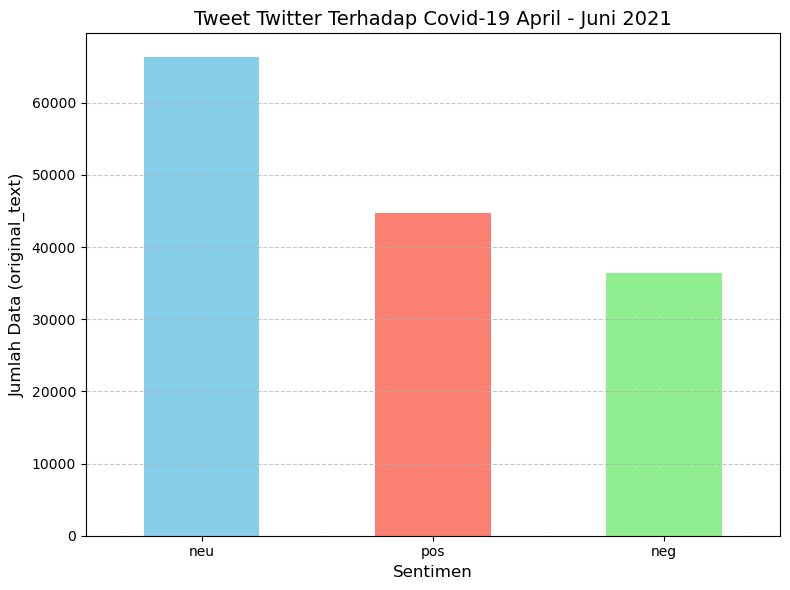

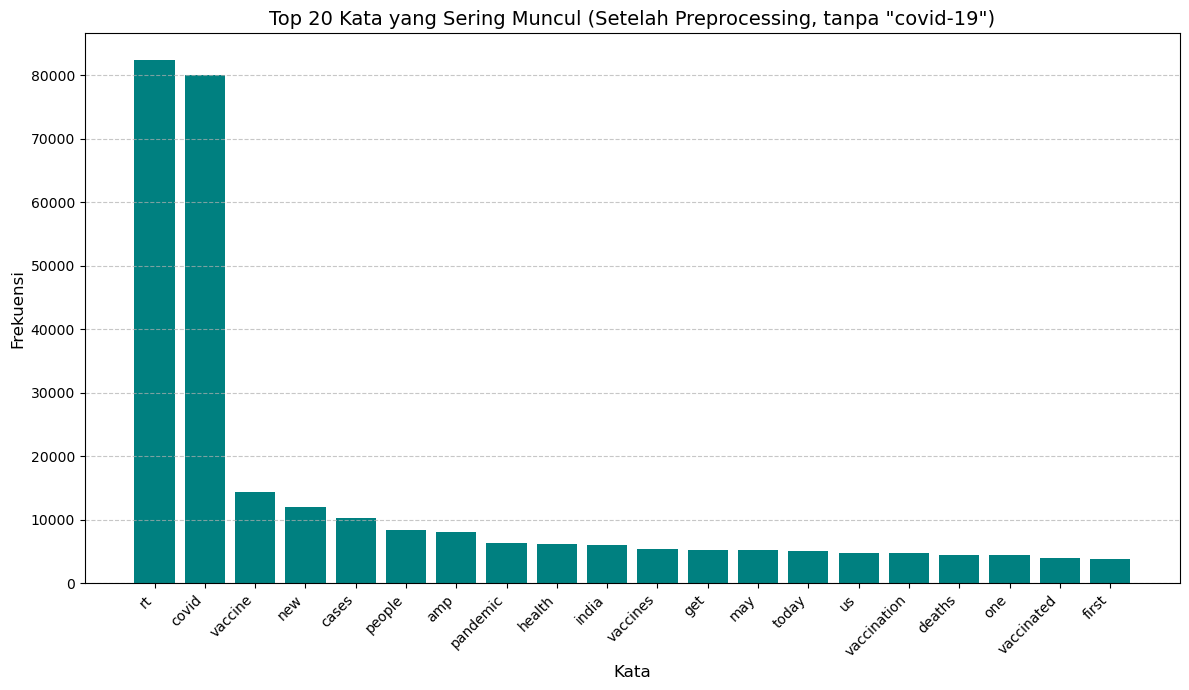

In [21]:
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# 2. Ensure consistency by dropping any NaN/missing values in 'labels' before counting
data.dropna(subset=['sentiment'], inplace=True)

# 3. Calculate sentiment distribution
sentiment_counts = data['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
# Plotting the counts, sorted by count in descending order
sentiment_counts.sort_values(ascending=False).plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Tweet Twitter Terhadap Covid-19 April - Juni 2021', fontsize=14)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Data (original_text)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('sentiment_distribution.png')
print("Bar chart distribusi sentimen telah dibuat dan disimpan sebagai 'sentiment_distribution.png'.")

# Apply Cleaning
data['tweets_clean'] = data['original_text'].apply(clean_text)

# Define remove_stopwords (re-defined here to ensure it runs)
english_stopwords = stopwords.words('english')

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in english_stopwords and word != 'covid-19'] # Exclude 'chatgpt' to see other topic words
    return ' '.join(filtered_tokens)

# Apply Stopword Removal (and exclude 'covid' which will dominate the count)
data['tweets_final'] = data['tweets_clean'].apply(remove_stopwords)

# Combine all final text into one string for Word Cloud
all_text = ' '.join(data['tweets_final'])

# Calculate the frequency of the top 20 words
from collections import Counter
word_counts = Counter(all_text.split())
top_20_words = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])

# --- Bar Chart for Top 20 Words ---
plt.figure(figsize=(12, 7))
plt.bar(top_20_words['Word'], top_20_words['Count'], color='teal')
plt.title('Top 20 Kata yang Sering Muncul (Setelah Preprocessing, tanpa "covid-19")', fontsize=14)
plt.xlabel('Kata', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('top_words_bar_chart.png')
print("Bar chart 20 kata paling sering muncul telah dibuat dan disimpan sebagai 'top_words_bar_chart.png'.")

# Print the top words data (optional, but good for understanding)
print("\nTop 20 Kata Paling Sering Muncul:")
print(top_20_words)



In [46]:


def clean_text(text):
    text = str(text).lower() 
    return text

data['tweets_clean'] = data['original_text'].apply(clean_text) 
print("Kolom 'tweets_clean' berhasil dibuat.")

print(data.columns)

print(data[['original_text', 'tweets_clean']].head())

Kolom 'tweets_clean' berhasil dibuat.
Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment',
       'tweets_clean', 'char_count', 'word_count', 'tweets_final',
       'tweets_tokenized', 'tweets_lemmatized', 'tweets_stemmed',
       'tweets_normalized', 'label_numeric'],
      dtype='object')
                                       original_text  \
0  RT @VP: The U.S. is working closely with the I...   
1  RT @JackPosobiec: Flip-Flop Fauci admits outdo...   
2  RT @timmy315: Hi Twitter, I’m Tim Manning, the...   
3  RT @itsaadee: Praying for #India as the countr...   
4  Rapid Investment in Nursing to Strengthen the ...   

                                        tweets_clean  
0  rt @vp: the u.s. is working closely with the i...  
1  rt @jackposobiec: flip-flop fauci admits outdo...  
2  rt @timmy315: hi twitter, i

## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan

#### 1. Tokenisasi 

In [22]:
def tokenize_simple(text):
    text = str(text) 
    return text.split() 

data['tweets_tokenized'] = data['tweets_clean'].apply(tokenize_simple)

print(" Tokenisasi berhasil.")
print(data[['tweets_clean', 'tweets_tokenized']].head())


 Tokenisasi berhasil.
                                                                                                                          tweets_clean  \
0  rt the u s is working closely with the indian government to rapidly deploy additional support and supplies during an alarming covid   
1                                                                     rt flip flop fauci admits outdoor covid transmission is very low   
2           rt hi twitter i m tim manning the white house covid supply coordinator there s been a lot of confusion around the use of t   
3                          rt praying for as the country battles the worst surge the world has witnessed let s all irrespective of the   
4                                                                  rapid investment in nursing to strengthen the global covid response   

                                                                                                                                             tweets_t

#### 2. Lemmatization 

In [23]:
# 2. Lemmatization
import nltk
from nltk.stem import WordNetLemmatizer

try:
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    print("NLTK Lemmatization resources berhasil diunduh.")
except Exception as e:
    print(f"Gagal mengunduh NLTK Lemmatization resources: {e}")

# Inisialisasi Lemmatizer
lemmatizer = WordNetLemmatizer()

def perform_lemmatization(text):
    # Lakukan tokenisasi sederhana (menggunakan hasil dari tweets_final)
    tokens = text.split() 
    
    # Lemmatization per kata
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Gabungkan kembali
    return ' '.join(lemmatized_tokens)

# Terapkan lemmatization pada kolom teks yang sudah bersih (tweets_final)
data['tweets_lemmatized'] = data['tweets_final'].apply(perform_lemmatization)

print("\n Lemmatization berhasil. Contoh Hasil:")
print(data[['tweets_final', 'tweets_lemmatized']].head())

[nltk_data] Downloading package wordnet to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Dede Ahmad
[nltk_data]     Maolana\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


NLTK Lemmatization resources berhasil diunduh.

 Lemmatization berhasil. Contoh Hasil:
                                                                                       tweets_final  \
0  rt u working closely indian government rapidly deploy additional support supplies alarming covid   
1                                          rt flip flop fauci admits outdoor covid transmission low   
2           rt hi twitter tim manning white house covid supply coordinator lot confusion around use   
3                           rt praying country battles worst surge world witnessed let irrespective   
4                                         rapid investment nursing strengthen global covid response   

                                                                                tweets_lemmatized  
0  rt u working closely indian government rapidly deploy additional support supply alarming covid  
1                                        rt flip flop fauci admits outdoor covid transmission 

#### 3. Stemming

In [24]:
# 3. Stemming

import nltk
from nltk.stem import PorterStemmer

# Inisialisasi Porter Stemmer
stemmer = PorterStemmer()

def perform_stemming(text):
    # Lakukan tokenisasi sederhana
    tokens = text.split() 
    
    # Stemming per kata
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    
    # Gabungkan kembali
    return ' '.join(stemmed_tokens)

data['tweets_stemmed'] = data['tweets_final'].apply(perform_stemming)

print("\n Stemming berhasil. Contoh Hasil:")
print(data[['tweets_final', 'tweets_stemmed']].head())


 Stemming berhasil. Contoh Hasil:
                                                                                       tweets_final  \
0  rt u working closely indian government rapidly deploy additional support supplies alarming covid   
1                                          rt flip flop fauci admits outdoor covid transmission low   
2           rt hi twitter tim manning white house covid supply coordinator lot confusion around use   
3                           rt praying country battles worst surge world witnessed let irrespective   
4                                         rapid investment nursing strengthen global covid response   

                                                                  tweets_stemmed  
0  rt u work close indian govern rapidli deploy addit support suppli alarm covid  
1                           rt flip flop fauci admit outdoor covid transmiss low  
2    rt hi twitter tim man white hous covid suppli coordin lot confus around use  
3             

#### 4. Stopword Removal (Tanda Baca, Angka, dan Kata)

In [25]:
# 4. Stopword removal (Tanda baca, angka dan kata)
english_stopwords = stopwords.words('english')

def remove_stopwords_and_finalize(text):
    tokens = text.split() 
    # BAGIAN INI: Membandingkan setiap kata dengan daftar stopwords
    filtered_tokens = [word for word in tokens if word not in english_stopwords and len(word) > 2] 
    return ' '.join(filtered_tokens)

data['tweets_final'] = data['tweets_clean'].apply(remove_stopwords_and_finalize)

#### 5. Text Normalisasi
Mengubah teks ke bentuk standar (huruf kecil, hapus spasi berlebih, singkatan umum, dsb).

In [26]:
# 5. Text Normalisasi
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def perform_lemmatization(text):
    tokens = text.split() 
    
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(lemmatized_tokens)

data['tweets_normalized'] = data['tweets_final'].apply(perform_lemmatization) 

print(" Teks berhasil dinormalisasi (Lemmatization).")
print(data[['tweets_final', 'tweets_normalized']].head())

 Teks berhasil dinormalisasi (Lemmatization).
                                                                                  tweets_final  \
0  working closely indian government rapidly deploy additional support supplies alarming covid   
1                                        flip flop fauci admits outdoor covid transmission low   
2            twitter tim manning white house covid supply coordinator lot confusion around use   
3                         praying country battles worst surge world witnessed let irrespective   
4                                    rapid investment nursing strengthen global covid response   

                                                                           tweets_normalized  
0  working closely indian government rapidly deploy additional support supply alarming covid  
1                                      flip flop fauci admits outdoor covid transmission low  
2          twitter tim manning white house covid supply coordinator lot confusio

#### 6. Labeling Data 

In [27]:
# 6. Labeling Polarity Numerik
label_mapping = {
    'pos': 1, 
    'neg': 0,   
    'neu': 2  
}
data['label_numeric'] = data['sentiment'].map(label_mapping)

Y = data['label_numeric']

print(" Pemetaan label numerik berhasil dibuat.")
print(data[['sentiment', 'label_numeric']].head())
print(f"Shape variabel target Y: {Y.shape}")

 Pemetaan label numerik berhasil dibuat.
  sentiment  label_numeric
0       pos              1
1       neg              0
2       neu              2
3       neg              0
4       pos              1
Shape variabel target Y: (147475,)


#### 7. Text Vektorisasi

In [ ]:
# 7. Text Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# 1. Definisikan X (Fitur Teks) dan Y (Target Numerik)
X = data['tweets_lemmatized']
Y = data['label_numeric'] 

# --- 2. DATA SPLITTING (Wajib Ada) ---
X_train_text, X_test_text, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size=0.3, # Skala 70:30
    random_state=42
)

# 3. Inisialisasi dan Fit Vectorizer
vectorizer = TfidfVectorizer(min_df=5)

# 4. Lakukan Fit dan Transform pada Data Training, dan Transform pada Data Testing
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

print(f" Vektor TF-IDF berhasil dibuat.")
print(f"Shape Matriks Fitur Training: {X_train.shape}")
print(f"Shape Matriks Fitur Testing: {X_test.shape}")

 Vektor TF-IDF berhasil dibuat.
Shape Matriks Fitur Training: (103232, 12592)
Shape Matriks Fitur Testing: (44243, 12592)


#### 8. Data Splitting

In [29]:
# 9. Data splitting
X_train_text, X_test_text, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size=0.3, 
    random_state=42
)



#### 9. Matrix Correlation 

KeyError: 'normalized_text'

## Data Modeling

In [3]:
# Berikan Penjelasan tentang model yang dipilih

#### Penjelasan Model

Model yang digunakan adalah Support Vector Machine (SVM), dimana algoritma ini merupakan pembelajaran terawasi (supervised learning) yang sangat efektif untuk tugas klasifikasi dan regresi, terutama dalam ruang fitur berdimensi tinggi, seperti data csv yang divetorisasi menggunakan TF-IDF.

##### 1. Konsep Dasar: Hyperplane dan Margin 
Tujuan utama SVM adalah menemukan hyperplane (bidang pemisah) terbaik yang membagi kelas-kelas data (Positif, Negatif, Netral) dalam ruang $N$-dimensi.Hyperplane: Batas keputusan yang memisahkan titik data dari kelas yang berbeda.Margin: Jarak antara hyperplane dan titik data terdekat dari setiap kelas. Titik data terdekat ini disebut Support Vectors.Optimal Hyperplane: SVM mencari hyperplane yang memiliki margin terbesar. Margin yang besar memberikan batas keputusan yang lebih kokoh dan membantu model memiliki kemampuan generalisasi yang lebih baik ke data baru.

##### 2. Penerapan SVM pada Data Teks (TF-IDF)

Dalam proyek Anda, data input ke SVM adalah matriks numerik yang dihasilkan dari TF-IDF Vectorization 
($X_{\text{train}}$ dan $X_{\text{test}}$).Fitur: Setiap dimensi (kolom) dalam matriks TF-IDF merepresentasikan bobot pentingnya suatu kata dalam kalimat (fitur). Karena TF-IDF biasanya menghasilkan ribuan fitur (kata unik), data Anda berada dalam ruang berdimensi tinggi.Proses: SVM menggunakan bobot-bobot TF-IDF ini untuk menentukan bagaimana setiap kalimat (data point) ditempatkan di ruang fitur. Kemudian, ia menemukan hyperplane optimal yang memisahkan kalimat-kalimat yang memiliki sentimen berbeda (misalnya, memisahkan kalimat "Netral" dari "Positif").

##### 3. Kernel Trick (Penanganan Data Non-Linier)

Salah satu kekuatan terbesar SVM adalah kemampuannya menangani data yang tidak dapat dipisahkan secara linier (data yang tidak bisa dipisah hanya dengan garis lurus atau bidang datar).

Fungsi Kernel: Melalui teknik yang disebut Kernel Trick, SVM secara implisit memetakan data Anda ke ruang berdimensi lebih tinggi. Di ruang baru ini, data non-linier menjadi dapat dipisahkan secara linier.

Pilihan Kernel: Untuk data TF-IDF (yang cenderung sudah cukup linier), kernel Linear seringkali merupakan pilihan yang cepat dan efektif. Namun, kernel seperti Radial Basis Function (RBF) dapat digunakan jika batas pemisahan sentimen ternyata kompleks.

##### 4. SVM

In [33]:
# Berikan Penjelasan tentang model yang dipilih
model_svc = LinearSVC(
    class_weight='balanced', 
    random_state=42, 
    max_iter=4000 
)

# Latih Model
model_svc.fit(X_train, Y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,42


In [35]:
# Prediksi dan Evaluasi
Y_pred = model_svc.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print("\n\n===== HASIL EVALUASI MODEL LINEAR SUPPORT VECTOR CLASSIFICATION (LinearSVC) =====")
print(f"Akurasi Model BARU: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred, target_names=['negatif (0)', 'positif (1)', 'netral (2)']))



===== HASIL EVALUASI MODEL LINEAR SUPPORT VECTOR CLASSIFICATION (LinearSVC) =====
Akurasi Model BARU: 0.9743

Classification Report:
              precision    recall  f1-score   support

 negatif (0)       0.97      0.95      0.96     10841
 positif (1)       0.97      0.97      0.97     13497
  netral (2)       0.98      1.00      0.99     19905

    accuracy                           0.97     44243
   macro avg       0.97      0.97      0.97     44243
weighted avg       0.97      0.97      0.97     44243



## Data Evaluasi

In [ ]:
# 1. Confussion Matrix 
# 2. Laporann Klasifikasi (Classification report)

#### 1. Confussion Matrix

<Figure size 800x600 with 0 Axes>

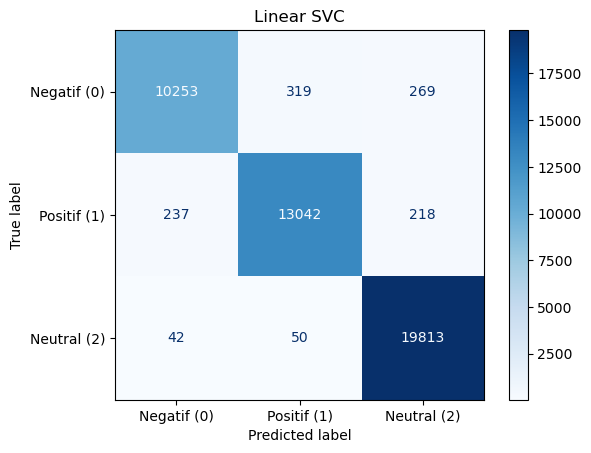


 Confusion Matrix berhasil dibuat dan ditampilkan.
Nilai mentah Confusion Matrix:
 [[10253   319   269]
 [  237 13042   218]
 [   42    50 19813]]


In [40]:
# 1. Confussion Matrix 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Hitung Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# 2. Definisikan Nama Label 
labels = ['Negatif (0)', 'Positif (1)', 'Neutral (2)']

# 3. Tampilkan Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Linear SVC')
plt.show()

print("\n Confusion Matrix berhasil dibuat dan ditampilkan.")
print("Nilai mentah Confusion Matrix:\n", cm)




#### 2. Laporan Klasifikasi

In [41]:
# 2. Laporann Klasifikasi (Classification report)
from sklearn.metrics import classification_report

# Mendefinisikan Nama Label
target_names = ['Negatif (0)', 'Positif (1)', 'Neutral (2)']

print("\n===== LAPORAN KLASIFIKASI MODEL Linear SVC =====")
print(classification_report(Y_test, Y_pred, target_names=target_names))

print(" Laporan Klasifikasi berhasil dibuat.")


===== LAPORAN KLASIFIKASI MODEL Linear SVC =====
              precision    recall  f1-score   support

 Negatif (0)       0.97      0.95      0.96     10841
 Positif (1)       0.97      0.97      0.97     13497
 Neutral (2)       0.98      1.00      0.99     19905

    accuracy                           0.97     44243
   macro avg       0.97      0.97      0.97     44243
weighted avg       0.97      0.97      0.97     44243

 Laporan Klasifikasi berhasil dibuat.


## Data Prediksi

In [ ]:
# Gunakan model yang sudah dibuat dan prediksi pada data baru

#### 1. Menambahkan Data Baru 
Data baru perkalimat 

#### Data Prediksi dengan Machine Learning

In [42]:
# Contoh data baru
data_baru = [
    "Finally got my covid vaccine today! Feeling great.",
    "Lockdowns are so frustrating and useless.",
    "Hospitals are doing their best to handle the crisis."
]

df_baru = pd.DataFrame({'tweet_baru': data_baru})


In [43]:
# 1. Cleaning
df_baru['tweets_clean'] = df_baru['tweet_baru'].apply(clean_text)

# 2. Stopword Removal
df_baru['tweets_final'] = df_baru['tweets_clean'].apply(remove_stopwords_and_finalize)

# 3. Lemmatization (Normalisasi Akhir)
df_baru['tweets_lemmatized'] = df_baru['tweets_final'].apply(perform_lemmatization)

print(" Data baru telah diproses.")

 Data baru telah diproses.


In [44]:
# 1. Vektorisasi Data Baru
X_new = df_baru['tweets_lemmatized']
X_new_vectorized = vectorizer.transform(X_new)

# 2. Prediksi Menggunakan Model MNB
Y_pred = model_svc.predict(X_test)

# 3. Konversi Prediksi Numerik ke Label Teks 
reverse_mapping = {1: 'positif (Positif)', 0: 'negatif (Negatif)', 2: 'neutral (Netral)'}
predictions_numeric = model_svc.predict(X_new_vectorized)

# 4. Tampilkan Hasil
predictions_label = [reverse_mapping[p] for p in predictions_numeric]
df_baru['Sentimen Prediksi'] = predictions_label

print("\n===== HASIL PREDIKSI DATA BARU =====")
print(df_baru[['tweet_baru', 'Sentimen Prediksi']])


===== HASIL PREDIKSI DATA BARU =====
                                             tweet_baru  Sentimen Prediksi
0    Finally got my covid vaccine today! Feeling great.  positif (Positif)
1             Lockdowns are so frustrating and useless.  negatif (Negatif)
2  Hospitals are doing their best to handle the crisis.  positif (Positif)


##### 2. Data dari kaggle yang sama

##### A. Menggunakan Model Machine Learning

In [45]:
import pandas as pd

# 1. Load dataset yang sama
file_path = 'Covid-19 Twitter Dataset (Apr-Jun 2020).csv'
df = pd.read_csv(file_path)

# 2. Pastikan kolom teks yang ingin diprediksi tersedia
kolom_teks = 'original_text'  # ganti sesuai kolom teks di dataset kamu
df['tweets_lemmatized'] = df[kolom_teks].astype(str)

# 3. Vektorisasi teks (menggunakan vectorizer dari model yang sudah dilatih)
X_all_vectorized = vectorizer.transform(df['tweets_lemmatized'])

# 4. Prediksi dengan model yang sudah dilatih
predictions_numeric = model_svc.predict(X_all_vectorized)

# 5. Ubah hasil numerik ke label teks
reverse_mapping = {
    1: 'positif (Positif)',
    0: 'negatif (Negatif)',
    2: 'neutral (Netral)'
}
predictions_label = [reverse_mapping[p] for p in predictions_numeric]

# 6. Simpan hasil prediksi ke dataframe
df['Sentimen Prediksi'] = predictions_label

# 7. Tampilkan beberapa hasil
print("\n===== HASIL PREDIKSI DATASET =====")
print(df[[kolom_teks, 'Sentimen Prediksi']].head(10))



===== HASIL PREDIKSI DATASET =====
                                                                                                                                  original_text  \
0   RT @GlblCtzn: .@priyankachopra is calling on leaders to help protect refugees from COVID-19 by providing them with quality health care and…   
1                          RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-NIRSAL COVID-19 TARGETED CREDIT FACILITY - TCF https://t.co/koWBQECoQq   
2   RT @AdvoBarryRoux: These 5 police officials based at Namahadi police station were busy drinking liquor at a certain tavern whilst on duty,…   
3                                                               RT @MobilePunch: COVID-19: Oyo discharges two patients\nhttps://t.co/eQRE00ZiJo   
4                                                                          My Condolences to the Family of those who did not survive #Covid_19!   
5  RT @DrJMZimmerman: I received this text from my 19 year old son who is working 

#### Virtualisasi

C:\Users\Dede Ahmad Maolana\AppData\Local\Temp\ipykernel_14172\209554401.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


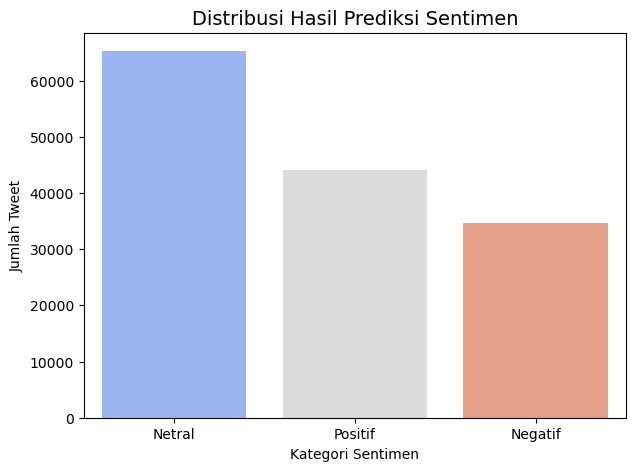

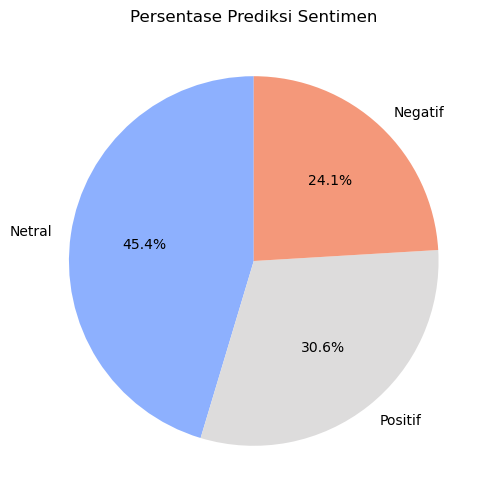

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Membaca dataset yang sama
file_path = 'Covid-19 Twitter Dataset (Apr-Jun 2020).csv'
df = pd.read_csv(file_path)

# 2. Pastikan teks sudah diproses seperti sebelumnya
kolom_teks = 'original_text'
df['tweets_lemmatized'] = df[kolom_teks].astype(str)

# 3. Vektorisasi & Prediksi
X_all_vectorized = vectorizer.transform(df['tweets_lemmatized'])
predictions_numeric = model_svc.predict(X_all_vectorized)

# 4. Ubah hasil numerik ke label teks
reverse_mapping = {1: 'Positif', 0: 'Negatif', 2: 'Netral'}
df['Sentimen Prediksi'] = [reverse_mapping[p] for p in predictions_numeric]

# 5. Hitung jumlah tiap kategori
sentiment_counts = df['Sentimen Prediksi'].value_counts()

# 6. Visualisasi menggunakan Seaborn
plt.figure(figsize=(7, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Distribusi Hasil Prediksi Sentimen', fontsize=14)
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Tweet')
plt.show()

# 7. (Opsional) Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', 3))
plt.title('Persentase Prediksi Sentimen')
plt.show()
